# RANDOM FOREST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
hour = pd.read_csv("hour.csv")

In [3]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
train = hour[:int(len(hour)*0.7)]
test = hour[int(len(hour)*0.7):]

In [5]:
print(len(train),len(test),len(train)+len(test),len(hour))

12165 5214 17379 17379


In [6]:
print(len(train.iloc[0]))
print(train.iloc[0,2:16])
print(train.iloc[0,16])

17
season             1
yr                 0
mnth               1
hr                 0
holiday            0
weekday            6
workingday         0
weathersit         1
temp            0.24
atemp         0.2879
hum             0.81
windspeed          0
casual             3
registered        13
Name: 0, dtype: object
16


In [7]:
X = hour.iloc[:, 2:16].values
y = hour.iloc[:, 16].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
y_train=y[:int(len(y)*0.7)]
y_test=y[int(len(y)*0.7):]
X_train=X[:int(len(X)*0.7),:]
X_test=X[int(len(X)*0.7):,:]

In [10]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

12165 5214 12165 5214


## En la siguiente imagen se muestra el set de datos de entrenamiento y test y como esta dividido.

## Como nuestro modelo es un modelo de prediccion entonces obtamos por trabajar con el 70% del set de datos original para el entrenamiento, y un 30% para test.

## La primera imagen muestra el set de datos de la variable respuesta completos.
## La segunda imagen muestra los datos divididos:
##              En azul : entrenamiento
##              Naranja : test


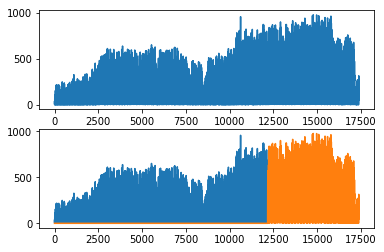

In [11]:
plt.figure()
plt.subplot(211)
plt.plot(y)
plt.subplot(212)
plt.plot(y_train)
aux=np.zeros(len(y_train))
aux=np.append(aux,y_test)
plt.plot(aux)
plt.show()

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
MAE=0
MSE=0
RMSE=0

In [14]:
num_arb=25
aux=25
for i in range(1,50):
    regressor = RandomForestRegressor(n_estimators = aux, random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    from sklearn import metrics
    MAE=np.append(MAE,metrics.mean_absolute_error(y_test, y_pred))
    MSE=np.append(MSE,metrics.mean_squared_error(y_test, y_pred))
    RMSE=np.append(RMSE,np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    aux=aux+25
    num_arb=np.append(num_arb,aux)
#print('Mean Absolute Error:', MAE)
#print('Mean Squared Error:', MSE)
#print('Root Mean Squared Error:', RMSE)

## En el siguiente grafico se muestran las graficas de los errores MAE, MSE y RMS para 
## el analisis de un numero optimo de arboles de desicion para este set de datos
## La primera imagen muestra el Error MAE
## La segunda imgagen muestra el Error MSE
## La tercera imagen muestra el error RMS
## Como se puede observar en la grafica de los 3 errores al rededor de (800 a 825) arboles existe un pico bajo de error, lo cual es similar a cuando se utilizara 1200 arboles, por lo que considerando un conste computacional, y una alta eficiencia se recomendaria trabajar con 800 arboles

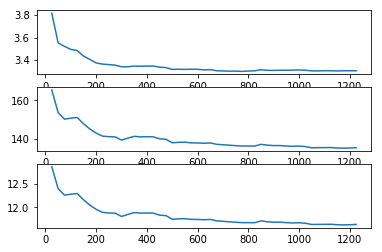

In [24]:
plt.figure()
plt.subplot(311)
plt.plot(num_arb,MAE[1:])
plt.subplot(312)
plt.plot(num_arb,MSE[1:])
plt.subplot(313)
plt.plot(num_arb,RMSE[1:])

## En la siguiente grafica podemos analizar la prediccion de las primeras 300 horas del set de test del sistema

## La primera imagen corresponde a los datos reales
## La segunda imagen corresponde a los datos predecidos utilizando nuestro modelo de Random forest
## La tercera imagen corresponde a una imagen montada de la grafica 1 y 2

## Se puede observar que realativamente nuestro sistema funciona eficientemente

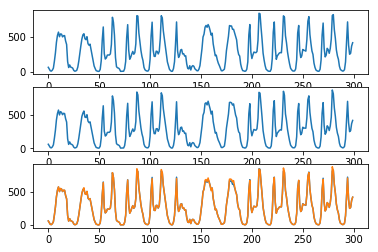

In [27]:
plt.figure()
plt.subplot(311)
plt.plot(y_pred[0:300])
plt.subplot(312)
plt.plot(y_test[0:300])
plt.subplot(313)
plt.plot(y_pred[0:300])
plt.plot(y_test[0:300])